# What does it take to be in the top 100 in FIFA?

## Introduction

Football is probably the most followed, romantic and appreciated sport in the world with hundreds of millions of people talking about it or dreaming to become professional football players. However, for most the dream vanishes with time and is shrunk to having to follow those who realized it by watching games on tv or by playing videogames. Among the various videogames the one that has accompanied us in our puberty and has led to disputes and laughter between friends is undisputedly FIFA. The game produced by Electronic Arts which every year sells millions of copies leads yearly to controversies and disputes related to the rating of players, in particular the best ones in the top 100. Since it appears to be quite interesting as a topic we would like to investigate what features in common have the players in the top 100 and what it takes to become recognized as one of the strongest players in the world. In order to extract some insights and answers, we’ll dig into the problem through some data exploration and graph visualization by also taking a look at the measures and communities detected by two hierarchical clustering algorithms. 

## Importing libraries

In [124]:
import plotly.express as px 
import seaborn as sns 
import networkx as nx
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import random
import community 
from community import community_louvain
from networkx.algorithms.community.centrality import girvan_newman 
from networkx.algorithms.community.quality import modularity
from networkx.algorithms.community import k_clique_communities
import matplotlib.cm as cm
import dash
from jupyter_dash import JupyterDash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output

## Importing dataset

In [125]:
df=pd.read_csv('players_fifa22.csv')
dfall=df.copy()
df=df.iloc[:100,]
df

,ID,Name,FullName,Age,Height,Weight,PhotoUrl,Nationality,Overall,Potential,...,LMRating,CMRating,RMRating,LWBRating,CDMRating,RWBRating,LBRating,CBRating,RBRating,GKRating
0,158023,L. Messi,Lionel Messi,34,170,72,https://cdn.sofifa.com/players/158/023/22_60.png,Argentina,93,93,...,93,90,93,69,67,69,64,53,64,22
1,188545,R. Lewandowski,Robert Lewandowski,32,185,81,https://cdn.sofifa.com/players/188/545/22_60.png,Poland,92,92,...,87,83,87,67,69,67,64,63,64,22
2,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,36,187,83,https://cdn.sofifa.com/players/020/801/22_60.png,Portugal,91,91,...,89,81,89,66,62,66,63,56,63,23
3,231747,K. Mbappé,Kylian Mbappé,22,182,73,https://cdn.sofifa.com/players/231/747/22_60.png,France,91,95,...,92,84,92,70,66,70,66,57,66,21
4,200389,J. Oblak,Jan Oblak,28,188,87,https://cdn.sofifa.com/players/200/389/22_60.png,Slovenia,91,93,...,38,41,38,35,39,35,35,36,35,92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,205498,Jorginho,Luiz Frello Filho Jorge,29,180,68,https://cdn.sofifa.com/players/205/498/22_60.png,Italy,85,85,...,80,85,80,80,84,80,78,75,78,21
96,204963,Carvajal,Daniel Carvajal Ramos,29,173,73,https://cdn.sofifa.com/players/204/963/22_60.png,Spain,85,85,...,81,81,81,85,84,85,85,83,85,23
97,200458,L. Digne,Lucas Digne,27,178,74,https://cdn.sofifa.com/players/200/458/22_60.png,France,84,84,...,81,81,81,84,82,84,84,81,84,19
98,197445,D. Alaba,David Alaba,29,180,78,https://cdn.sofifa.com/players/197/445/22_60.png,Austria,84,84,...,82,84,82,84,84,84,84,84,84,21


# Data Exploration

### Some data exploration on the top 100 players in Fifa

In the graph below there is the count of players by nation

In [126]:
dfnationscount=df.iloc[:100,]
n_records = len(dfnationscount)
dfnationscount = dfnationscount.groupby(['Nationality']).size().to_frame('Count').reset_index()
percs = dfnationscount['Count'] *100 /sum(dfnationscount['Count'])
percs = percs.apply(lambda x: '{0:1.2f}%'.format(x))
fig4 = px.bar(dfnationscount, x='Nationality', y='Count', text=percs ,barmode='group')
fig4.update_traces(textposition='outside')
fig4.show()
#Count of players in the top 100 by nation 
#Most of the players are spanish,german,french or brazilian 

This graph shows the teams with the highest mean rating. We use the full dataset,thus including all the 19200 players 

In [127]:
df_plt1 = dfall.groupby('Club').mean().reset_index()
df_plt1=df_plt1.sort_values(by = 'Overall',ascending=False)
df_plt1=df_plt1.iloc[ 1:11, :]
df_plt1=df_plt1.loc[:,['Overall','Club']]
fig1= px.bar(df_plt1, x = 'Club', y = 'Overall', color='Club',color_discrete_map={"Paris Saint-Germain":"#D2E0A3", "Inter":"#00678a","FC Bayern München":"#f19670","Napoli":"#796E8C","Real Madrid CF":"#e279a3", "Manchester United":"#5698c4", "Atalanta":"#e0598b", "FC Barcelona":"#e9d78e", "Real Sociedad":"#51574a", "SL Benefica":"#4e2472"}, title = 'Top 10 Clubs for mean of Overall of players  ')
fig1.update_layout(xaxis_tickangle=90, xaxis_title = 'Clubs')
fig1.update_layout(uniformtext_minsize=0.4)
fig1.update_yaxes(range=[76, 80])
#PSG , Inter (Obviously) and Bayer Munich are the teams whose players have highest mean rating (even players not included in the top 100)

We plot another bar chart as before but restricting the dataset to only the best 100 players

In [128]:
df_pl = df.groupby('Club').mean().reset_index()
df_pl=df_pl.sort_values(by = 'Overall',ascending=False)
df_pl=df_pl.iloc[ 1:11, :]
df_pl=df_pl.loc[:,['Overall','Club']]
fig1= px.bar(df_pl, x = 'Club', y = 'Overall',  color='Club', color_discrete_map={"Paris Saint-Germain":"#D2E0A3", "FC Bayern München":"#f19670","Liverpool":"#be5168","Chelsea":"#65387d","Real Madrid CF":"#e279a3", "Manchester United":"#5698c4", "Atlético de Madrid":"#74c493", "FC Barcelona":"#e9d78e", "Manchester City":"#e16552", "Borussia Dortmund":"#a34974"}, title = 'Top 10 Clubs for mean of Overall of players  ',color_continuous_scale=px.colors.sequential.Sunsetdark)
fig1.update_layout(xaxis_tickangle=90, xaxis_title = 'Clubs')
fig1.update_layout(uniformtext_minsize=0.4)
fig1.update_yaxes(range=[85, 90])
#PSG ,Bayer Munich and Liverpool are the teams whose players have highest mean rating  in the top 100

Bar chart of the five nations with the highest mean age of players

In [129]:
df_plt2 = df.groupby('Club').mean().reset_index()
df_plt2=df_plt2.sort_values(by = 'Age',ascending=False)
df_plt2=df_plt2.iloc[ 1:6, :]
df_plt2=df_plt2.loc[:,['Age','Club']]
df_plt2=df_plt2.sort_values(by='Age',ascending=False)
fig2= px.bar(df_plt2, x = 'Club', y = 'Age',title = 'Top 5 Clubs with highest average age for players in the top 100 ')
fig2.update_traces(marker_color='darkblue')
fig2.update_layout(xaxis_tickangle=0, xaxis_title = 'Clubs')
fig2.update_layout(uniformtext_minsize=0.4)
fig2.update_yaxes(range=[30, 33])
#The five clubs with the highest mean of the ages of players are the ones reported below

This function serves to add a column by splittin players by roles

In [130]:
def add_role(df):
    df['role']=0
    goalkeepers=['GK']
    defenders=['RB','RWB','LB','LWB','CB']
    midfielders=['CAM','CDM','CM','RM','LM']
    strikers=['RW','LW','RF','LF','CF','ST']
    substitues=['RES','SUB']
    i=0
    for el in df['BestPosition']:
        if el in defenders:
            df['role'][i]='Defenders'
        elif el in midfielders:
            df['role'][i]='Midfielders'
        elif el in strikers:
            df['role'][i]='Strikers'
        else:
            df['role'][i]='Goalkeepers'
        i+=1
add_role(df)
df
#Splitting the different players into generic categories related to their position on the field

/var/folders/sc/r0jqlfy569scw9syx066s6n80000gn/T/ipykernel_1833/500464108.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,ID,Name,FullName,Age,Height,Weight,PhotoUrl,Nationality,Overall,Potential,...,CMRating,RMRating,LWBRating,CDMRating,RWBRating,LBRating,CBRating,RBRating,GKRating,role
0,158023,L. Messi,Lionel Messi,34,170,72,https://cdn.sofifa.com/players/158/023/22_60.png,Argentina,93,93,...,90,93,69,67,69,64,53,64,22,Strikers
1,188545,R. Lewandowski,Robert Lewandowski,32,185,81,https://cdn.sofifa.com/players/188/545/22_60.png,Poland,92,92,...,83,87,67,69,67,64,63,64,22,Strikers
2,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,36,187,83,https://cdn.sofifa.com/players/020/801/22_60.png,Portugal,91,91,...,81,89,66,62,66,63,56,63,23,Strikers
3,231747,K. Mbappé,Kylian Mbappé,22,182,73,https://cdn.sofifa.com/players/231/747/22_60.png,France,91,95,...,84,92,70,66,70,66,57,66,21,Strikers
4,200389,J. Oblak,Jan Oblak,28,188,87,https://cdn.sofifa.com/players/200/389/22_60.png,Slovenia,91,93,...,41,38,35,39,35,35,36,35,92,Goalkeepers
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,205498,Jorginho,Luiz Frello Filho Jorge,29,180,68,https://cdn.sofifa.com/players/205/498/22_60.png,Italy,85,85,...,85,80,80,84,80,78,75,78,21,Midfielders
96,204963,Carvajal,Daniel Carvajal Ramos,29,173,73,https://cdn.sofifa.com/players/204/963/22_60.png,Spain,85,85,...,81,81,85,84,85,85,83,85,23,Defenders
97,200458,L. Digne,Lucas Digne,27,178,74,https://cdn.sofifa.com/players/200/458/22_60.png,France,84,84,...,81,81,84,82,84,84,81,84,19,Defenders
98,197445,D. Alaba,David Alaba,29,180,78,https://cdn.sofifa.com/players/197/445/22_60.png,Austria,84,84,...,84,82,84,84,84,84,84,84,21,Defenders


Pie plot of best 100 players by role

In [131]:
df_pie = df.groupby("role").size().to_frame('count').reset_index()
fig3= px.pie(df_pie, values='count', names='role', title='Percentage of players by role in the top 100',color_discrete_sequence=px.colors.qualitative.Pastel)
# Define hover info, text size, pull amount for each pie slice, and stroke
fig3.update_traces(hoverinfo = 'label+percent', textfont_size = 12,
                  textinfo = 'label+percent', pull = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1])
fig3.show()
#Prevalence of Midfielders and Defenders
#This is an interactive graph you can remove and add categories from the legend

# Dashboard

Dashboard with 3 charts on best 100 players: \
1- Scatter plot of Shooting Total vs Pace Total of strikers that can be filtered with a slider for Skill Moves and with a dropdown menu for the Preferred Foot\
2- Scatterplot of Overall vs Age of all players that can be filtered with a slider for IntReputation (Reputation in the football world)\
3- Scatterplot of Defendending Total vs Age that can be filtered with a slider for Defensive Work Rate and with a dropdown menu for the Preferred Foot*

In [132]:
SkillMoves=df['SkillMoves'].unique().tolist().sort()
foot_options=df['PreferredFoot'].unique().tolist()
Reputation=df['IntReputation'].unique().tolist().sort()
defenders=df[df['role']=='Defenders']
defenders['DefensiveWorkRate']=defenders['DefensiveWorkRate'].replace('Low','1')
defenders['DefensiveWorkRate']=defenders['DefensiveWorkRate'].replace('Medium','2')
defenders['DefensiveWorkRate']=defenders['DefensiveWorkRate'].replace('High','3')
defenders['DefensiveWorkRate']=defenders['DefensiveWorkRate'].astype(int)
defenders['OnLoad']==defenders['OnLoad'].replace(False,'Owned')
defenders['OnLoad']==defenders['OnLoad'].replace(True,'On Loan')
defensiveworkrate= defenders['DefensiveWorkRate'].unique().tolist()
defensiveworkrate.sort()

/var/folders/sc/r0jqlfy569scw9syx066s6n80000gn/T/ipykernel_1833/1273140932.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/sc/r0jqlfy569scw9syx066s6n80000gn/T/ipykernel_1833/1273140932.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/sc/r0jqlfy569scw9syx066s6n80000gn/T/ipykernel_1833/1273140932.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

In [133]:
external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css'] 
app = JupyterDash(__name__, external_stylesheets = external_stylesheets)

In [134]:
app.layout = html.Div([
		html.Div([
				html.Div([
						html.P( "Filter by Skillmoves :", className = "control_label"),
						dcc.RangeSlider(id = "skill_slider",
							            min = 2,
							            max = 5,
							            value = [2, 5],
							            className = "dcc_control"),
						html.P("Filter by Preferred foot:", className = "control_label"),
						dcc.Dropdown(   id = "Preferredfoot",
                                        options =[{'label':foot_options[0],'value':'Left'},
										{'label':foot_options[1],'value':'Right'}],
                                        multi = True,
                                        value = ['Left', 'Right'],
                                        className = "dcc_control")
					],
					className = "pretty_container four columns",
					id = "cross-filter-options",
				),
				html.Div(   [dcc.Graph(id = "graph")],
                            id = "countGraphContainer",
                            className = "pretty_container eight columns",
				),
			],
			className = "row flex-display",
		),
		html.Div([
				html.Div([
						html.P( "Filter by Reputation :", className = "control_label"),
						dcc.RangeSlider(id = "skill_slider2",
							            min = 1,
							            max = 5,
							            value = [1, 5],
										marks={1:'1',
										2:'2',
										3:'3',
										4:'4',
										5:'5'},
							            className = "dcc_control"),
					],
					className = "pretty_container four columns",
					id = "cross-filter",
				),
				html.Div(   [dcc.Graph(id = "Reputation")],
                            id = "GraphContainer",
                            className = "pretty_container eight columns",
				),
			],
			className = "row flex-display",
		),
		html.Div([
				html.Div([
						html.P( "Filter by Defensive Work Rate :", className = "control_label"),
						dcc.RangeSlider(id = "slider",
							            min = 1,
							            max = 3,
							            value = [1, 3],
										marks={
											1:'L',
											2:'M',
											3:'H',
										},
							            className = "dcc_control"),
						html.P("Foot :", className = "control_label"),
						dcc.Dropdown(   id = "Foot",
                                         options =[{'label':foot_options[0],'value':'Left'},
						 				{'label':foot_options[1],'value':'Right'}],
                                         multi = True,
                                         value = ['Left', 'Right'],
                                         className = "dcc_control")
					],
					className = "pretty_container four columns",
					id = "crosfilt",
				),
				html.Div(   [dcc.Graph(id = "grafico")],
                            id = "grafico2",
                            className = "pretty_container eight columns",
				),
			],
			className = "row flex-display",
		),
		
],
	id="mainContainer",
	style={"display": "flex", "flex-direction": "column"}
)

In [135]:
@app.callback(	Output("graph", "figure"),[Input("skill_slider", "value"),Input('Preferredfoot','value')])
def scatter(Skills,Preferredfoot):
    strikmid=df[df['role']=='Strikers' ]
    temp=strikmid[strikmid['PreferredFoot'].isin(Preferredfoot)]
    temp=temp[temp['SkillMoves'].isin(list(range(Skills[0],Skills[-1]+1)))]
    fig5= px.scatter(temp, x="ShootingTotal", y="PaceTotal", size = "Overall",symbol="SkillMoves",color='PreferredFoot',title='Strikers')
    return fig5

In [136]:
@app.callback(	Output("Reputation", "figure"),	Input("skill_slider2", "value"))
def scatter(Reputation):
    temp2=df[df['IntReputation'].isin(list(range(Reputation[0],Reputation[-1]+1)))]
    fig6= px.scatter(temp2, y="Age", x="Overall",color='IntReputation',title='Players',color_continuous_scale=px.colors.sequential.deep)
    return fig6

In [137]:
@app.callback(	Output("grafico", "figure"),[Input("slider", "value"),Input('Foot','value')])
def scatter(prestazione,piede):
   temp3=defenders[defenders['PreferredFoot'].isin(piede)]
   temp3=temp3[temp3['DefensiveWorkRate'].isin(list(range(prestazione[0],prestazione[-1]+1)))]
   fig7= px.scatter(temp3, x="DefendingTotal", y="Age", size = "Overall",color='PreferredFoot',symbol='DefensiveWorkRate',  color_discrete_sequence=px.colors.qualitative.Pastel,title='Defenders')
   return fig7


In [138]:
app.run_server(mode='inline')

# Network Analysis

 Since we didn't have a proper dataset for network or graph visualization we had to create the columns and edges ourselves. In order to identify whether it is true that to be in the top 100 players it is necessary to be part of one of the best teams in the world we decided to create edges between all the players belonging to the same Club or with the same nationality

## First Graph

Function to create Source and Target columns for Gephi and Networkx visualization

In [139]:
# we'll build a function that will create two columns 'Source' and 'Target' in a new dataframe that will define the edges between players in the same team and with the same nationality.
df2=df.iloc[:100,]
df3=pd.DataFrame(index=list(range(0,542)))
df4=pd.DataFrame(index=list(range(0,582)))
lsourceclub=[]
ltargetclub=[]
lsourcenations=[]
ltargetnations=[]
nolink=[]
def clubs(name):
    l=[]
    for el in range(0,len(df2['Name'])):
        if df2['Name'][el]==name:
            ind=el
    for i in range(0,len(df2['Name'])):
        if df2['Club'][i]==df2['Club'][ind] and i!=ind:
            l.append(df2['Name'][i])
    if len(l)!=0:
        for x in l:
            lsourceclub.append(df2['Name'][ind])
            ltargetclub.append(x)
    else:
        lsourceclub.append(df2['Name'][ind])
        ltargetclub.append(df2['Name'][ind])
    l.clear()
    df3['Source']=pd.Series(lsourceclub)
    df3['Target']=pd.Series(ltargetclub)
    return lsourceclub,ltargetclub
for i in df2['Name']:
    clubs(i)    
def nationality(name):
    l=[]
    for el in range(0,len(df2['Name'])):
        if df2['Name'][el]==name:
            ind=el
    for i in range(0,len(df2['Name'])):
        if df2['Nationality'][i]==df2['Nationality'][ind] and i!=ind:
            l.append(df2['Name'][i])
            if len(l)!=0:
                for x in l:
                    lsourcenations.append(df2['Name'][ind])
                    ltargetnations.append(x)
            else:
                lsourcenations.append(df2['Name'][ind])
                ltargetnations.append(df2['Name'][ind])
        l.clear()
        df4['Source']=pd.Series(lsourcenations)
        df4['Target']=pd.Series(ltargetnations)
    return lsourcenations,ltargetnations
for c in df2['Name']:
    nationality(c)    
len(lsourcenations)
len(ltargetnations)

/var/folders/sc/r0jqlfy569scw9syx066s6n80000gn/T/ipykernel_1833/2022340965.py:47: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.

/var/folders/sc/r0jqlfy569scw9syx066s6n80000gn/T/ipykernel_1833/2022340965.py:48: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.

/var/folders/sc/r0jqlfy569scw9syx066s6n80000gn/T/ipykernel_1833/2022340965.py:47: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.

/var/folders/sc/r0jqlfy569scw9syx066s6n80000gn/T/ipykernel_1833/2022340965.py:48: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.



582

In [140]:
#Exporting dataframe with top 100 players connected by club and nation
#This cell of code creates a csv file with the top 100 players by Source and Target 
dfgephi=pd.concat([df3,df4])
dfgephi.to_csv('Top100playersconnection.csv')
dfgephi=pd.read_csv('Top100playersconnection.csv')
dfgephi.drop('Unnamed: 0',axis=1)

,Source,Target
0,L. Messi,K. Mbappé
1,L. Messi,Neymar Jr
2,L. Messi,G. Donnarumma
3,L. Messi,Sergio Ramos
4,L. Messi,K. Navas
...,...,...
1119,Luis Alberto,A. Laporte
1120,Luis Alberto,David Silva
1121,Luis Alberto,Koke
1122,Luis Alberto,Oyarzabal


## Graph Measures

Function to find number of components and largest component in case we have more than one

In [141]:
def Components(Graph):
    connectedornot=nx.is_connected(Graph) #Is the graph connected? 
    print('Is the graph connected?:\n'+str(connectedornot))
    numberofcomponents=nx.number_connected_components(Graph) #Number of connected components
    print('Number of components:\n'+ str(numberofcomponents))
    largest_cc_nodeset = max(nx.connected_components(Graph), key=len) #Largest of connected components
    largest_component = Graph.subgraph(largest_cc_nodeset).copy()
    print('The biggest component  is a:\n'+str(largest_component))

This is a function to compute all the measures related to the biggest  component of the graph. Performing such thing on the other components would be irrelevant since they are all single unconnected components 

In [142]:
def ComponentMeasures(Component):
    numberofnodes=Component.number_of_nodes()
    print('Number of nodes of the biggest component:\n'+str(numberofnodes)) #Number of nodes
    degree_centrality = nx.degree_centrality(Component) #Degree Centrality
    degree_centrality_sort = sorted(degree_centrality.items(), key=lambda x:x[1], reverse = True)
    print('Degree Centrality of top 10 nodes:\n'+ str(degree_centrality_sort[0:10]))
    betwenness_centrality = nx.betweenness_centrality(Component, normalized=False)
    betwenness_centrality_sort = sorted(betwenness_centrality.items(), key=lambda x:x[1], reverse = True) #Betwenness Centrality
    print('Betwenness Centrality of top 10 nodes:\n'+ str(betwenness_centrality_sort[0:10]))
    closeness_centrality=nx.closeness_centrality(Component) #Closeness Centrality
    closeness_centrality_sort = sorted(closeness_centrality.items(), key=lambda x:x[1], reverse = True)
    print('Closeness Centrality of top 10 nodes:\n'+ str(closeness_centrality_sort[0:10])) 
    clustering_coefficient=nx.clustering(Component) #Clustering Coefficient
    clustering_coefficient_sort = sorted(clustering_coefficient.items(), key=lambda x:x[1], reverse = True)
    print('Clustering Coefficient of top 10 nodes:\n'+ str(clustering_coefficient_sort[0:10]))
    density=nx.density(Component) #Density
    print('Density of the component:\n'+str(density))
    diameter=nx.diameter(Component) #Diameter of the component
    print('Diameter of the component:\n'+ str(diameter))
    Avg_shortest_path=nx.average_shortest_path_length(Component) #Average shortest path of the component
    print('Average Shortest Path:\n'+str(Avg_shortest_path))


Function to plot degree distribution of nodes

In [143]:
def degree(Component,grafo):
    degrees=[ ] #Distribution of degrees
    for v in Component.nodes():
        degrees.append(grafo.degree(v))
    plt.figure(figsize=(12, 7)) 
    plt.title('Plot of Degree Distribution of nodes ')
    sns.countplot(x=degrees)
    plt.xlabel('Degree')
    plt.ylabel('Count')
    plt.show()

#### Creating a networkx graph for first graph dataset

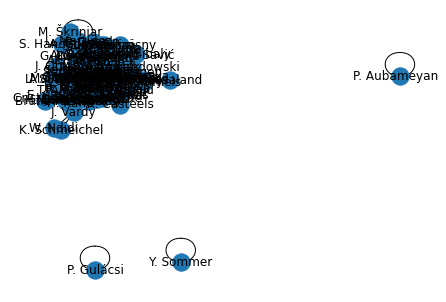

In [144]:
#Creating a graph with networkx
grafo=nx.from_pandas_edgelist(dfgephi,'Source','Target')
#Plotting graph
nx.draw(grafo,with_labels=True)
#A few players with self loop--> meaning that they don't have any nation or teammate in the top 100. 
#Will they represent a community of their own or will be they considered as belonging to a single community?

Computing components measure and community detection for the first dataset (edges between all players in the same nation and all players in the same team)


Is the graph connected?:
False
Number of components:
4
The biggest component  is a:
Graph with 97 nodes and 530 edges
Number of nodes of the biggest component:
97
Degree Centrality of top 10 nodes:
[('Sergio Ramos', 0.22916666666666666), ('Rodri', 0.22916666666666666), ('A. Laporte', 0.22916666666666666), ('Thiago', 0.21875), ('Carvajal', 0.20833333333333331), ('I. Gündoğan', 0.19791666666666666), ('K. Mbappé', 0.17708333333333331), ('Ederson', 0.17708333333333331), ('Sergio Busquets', 0.17708333333333331), ('Jordi Alba', 0.17708333333333331)]
Betwenness Centrality of top 10 nodes:
[('K. Mbappé', 318.62127030005905), ('I. Gündoğan', 299.0162837307157), ('Sergio Ramos', 266.5802131262304), ('T. Alexander-Arnold', 248.21397301829597), ('M. ter Stegen', 215.4718641519554), ('Thiago', 212.8580792204013), ('Carvajal', 204.95283494259007), ('K. Coman', 201.95622424733523), ('V. van Dijk', 200.36893280763155), ('Rodri', 199.6868801498508)]
Closeness Centrality of top 10 nodes:
[('Rodri', 0.48

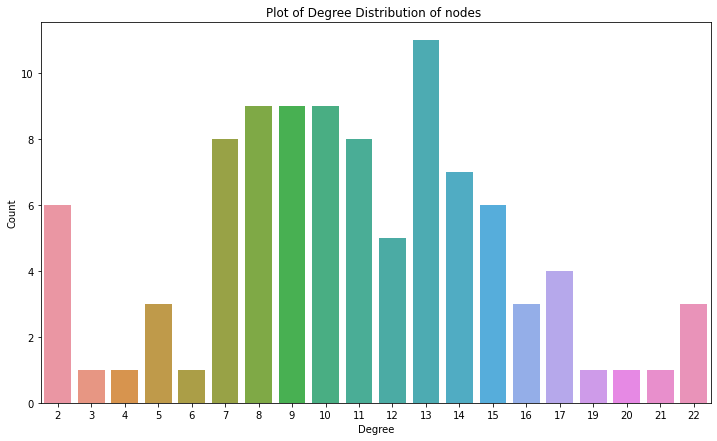

In [145]:
largest_cc_nodeset = max(nx.connected_components(grafo), key=len) #Largest of connected components
Component = grafo.subgraph(largest_cc_nodeset).copy()
Components(grafo)
ComponentMeasures(Component)
degree(Component,grafo)

The fact that the distribution of the degree of nodes doesn't follow a power-law distribution so this might tell us that maybe we 're not really dealing with a social network. There are a lot of clique probably this will be seen in the last part

## Community Detection

#### Looking for communities with a divisive algorithm --> Girvan-Newman

[['T. Alexander-Arnold', 'T. Courtois', 'Luis Alberto', 'N. Kanté', 'T. Müller', 'A. Griezmann', 'Carvajal', 'L. Modrić', 'E. Haaland', 'A. Robertson', 'K. De Bruyne', 'S. Milinković-Savić', 'Koke', 'S. Agüero', 'Alisson', 'Cristiano Ronaldo', 'Marcos Llorente', 'Ederson', 'João Cancelo', 'David Silva', 'L. Messi', 'K. Benzema', 'R. Mahrez', 'Parejo', 'E. Cavani', 'R. Sterling', 'L. Martínez', 'M. Reus', 'S. Gnabry', 'J. Vardy', 'F. de Jong', 'K. Walker', 'Fabinho', 'E. Hazard', 'J. Kimmich', 'Neymar Jr', 'Thiago', 'K. Navas', 'M. Verratti', 'H. Kane', 'Gerard Moreno', 'M. de Ligt', 'K. Casteels', 'G. Chiellini', 'D. Alaba', 'A. Hakimi', 'I. Gündoğan', 'M. ter Stegen', 'Sergio Ramos', 'Sergio Busquets', 'J. Sancho', 'Thiago Silva', 'M. Salah', 'J. Oblak', 'R. Lewandowski', 'M. Rashford', 'Bernardo Silva', 'A. Laporte', 'L. Bonucci', 'W. Szczęsny', 'Oyarzabal', 'Marquinhos', 'G. Donnarumma', 'Casemiro', 'T. Kroos', 'Bruno Fernandes', 'L. Insigne', 'L. Goretzka', 'Rodri', 'L. Digne', 'K.

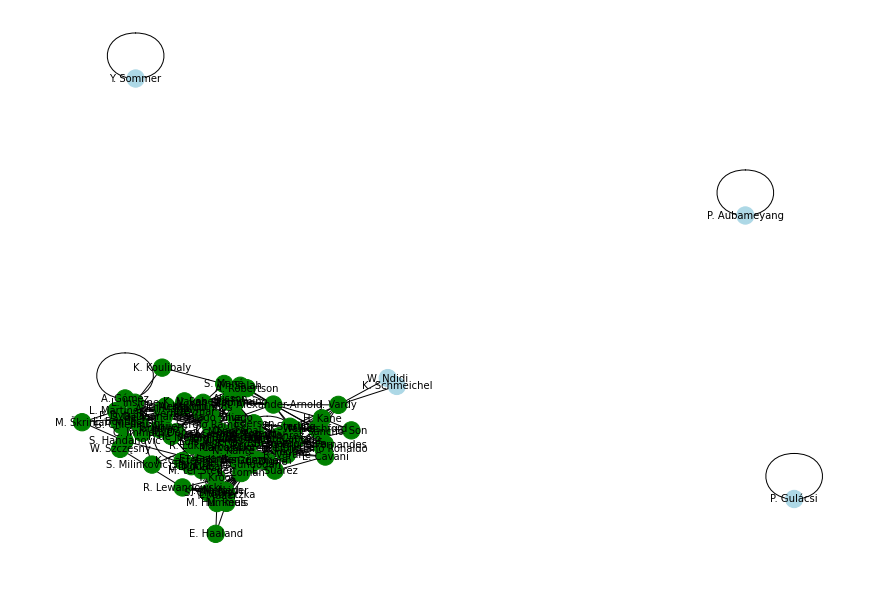

In [146]:
##Girvan Newman community detection --> Divisive clustering
communities=girvan_newman(grafo, most_valuable_edge=None)
plt.figure(figsize=(12,8))
node_groups = []
for com in next(communities):
  node_groups.append(list(com))
print(node_groups)
color_map = []
for node in grafo:
    if node in node_groups[0]:
      color_map.append('green')
    else: 
      color_map.append('lightblue')  
nx.draw(grafo, node_color=color_map, with_labels=True, font_size=10)
plt.show()

#### Why Ndidi and Schmeichel belong to the purple community and not to the green one composed by all the nodes in the giant components?

In [147]:
print('Schmeichel ranking and team:\n' + str(df[df['Name']=='K. Schmeichel'].Club))
print('Leicester City players:\n' + str(df[df['Club']=='Leicester City'].Name)) ##There are also other two players coming from leicester city 
# Let's take a look at those from Schmeichel's nationality
print(str(df[df['Name']=='K. Schmeichel'].Nationality))
df[df['Nationality']=='Denmark'] 
#The reason for him to belong to another community is that he is the only one of his nation to be in the top 100 

Schmeichel ranking and team:
77    Leicester City
Name: Club, dtype: object
Leicester City players:
63         J. Vardy
77    K. Schmeichel
93         W. Ndidi
Name: Name, dtype: object
77    Denmark
Name: Nationality, dtype: object


,ID,Name,FullName,Age,Height,Weight,PhotoUrl,Nationality,Overall,Potential,...,CMRating,RMRating,LWBRating,CDMRating,RWBRating,LBRating,CBRating,RBRating,GKRating,role
77,163587,K. Schmeichel,Kasper Schmeichel,34,189,89,https://cdn.sofifa.com/players/163/587/22_60.png,Denmark,85,85,...,41,37,33,38,33,32,31,32,85,Goalkeepers


In [148]:
print('W. Ndidi ranking and team:\n' + str(df[df['Name']=='W. Ndidi'].Club))
print('Leicester City players:\n' + str(df[df['Club']=='Leicester City'].Name)) ##There are also other two players coming from leicester city 
# Let's take a look at those from Ndidi's nationality
print(str(df[df['Name']=='W. Ndidi'].Nationality))
df[df['Nationality']=='Nigeria'] 
#The reason for him to belong to another community is that he is the only one of his nation to be in the top 100 

W. Ndidi ranking and team:
93    Leicester City
Name: Club, dtype: object
Leicester City players:
63         J. Vardy
77    K. Schmeichel
93         W. Ndidi
Name: Name, dtype: object
93    Nigeria
Name: Nationality, dtype: object


,ID,Name,FullName,Age,Height,Weight,PhotoUrl,Nationality,Overall,Potential,...,CMRating,RMRating,LWBRating,CDMRating,RWBRating,LBRating,CBRating,RBRating,GKRating,role
93,226790,W. Ndidi,Wilfred Ndidi,24,183,74,https://cdn.sofifa.com/players/226/790/22_60.png,Nigeria,85,88,...,79,73,81,85,81,82,86,82,22,Defenders


The reason for Ndidi and Schemichel not belonging to the big green community is because they are the only ones of their nation

#### Looking for communities with an agglomerative algorithm --> Louavin method

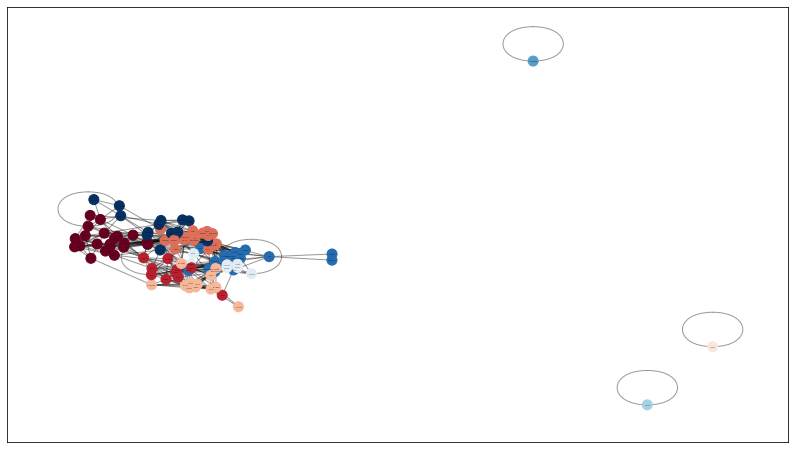

In [149]:
##Louvain community detection --> Agglomerative clustering
partition = community_louvain.best_partition(grafo)
plt.figure(figsize=(14,8))
# draw the graph
pos = nx.spring_layout(grafo)
# color the nodes according to their partition
cmap = cm.get_cmap('RdBu', max(partition.values()) + 1)
nx.draw_networkx_nodes(grafo, pos, partition.keys(), node_size=100,
                       cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(grafo, pos, alpha=0.4)
nx.draw_networkx_labels(grafo,pos,font_size=1)
plt.show()
#Different communities : Communities by team  and nationalities
# The three players that do not belong to the giant component represent a community fo their own (Each one is of a different community)

The three players (Aubameyang,Gulacsi and Sommer) that do not belong to the giant component represent a community fo their own (Each one is of a different community)

In [150]:
#Function to find different n-nodes cliques in graphs (x is the graph. Initialnumber is the smallest number of node clique you want to find ,endingnumber is the highest number of nodes clique you want to find)
def findcliques(x,initialnumber,endingnumber):
    for c in range(initialnumber,endingnumber+1):
        comm=list(k_clique_communities(x,c))
        print(str(c)+'-nodes clique:\n')
        if len(list(comm))!=0:
            for el in range(0,len(list(comm))):
                print(str(list(comm[el]))+'\n')
        else:
            print("I'm sorry there are no "+str(c)+"-nodes cliques in this graph\n")

We would reccommend to try it out with the a higher number like 10 or 11  ;)\
(hint:  there are cliques of more than 10 nodes)

In [151]:
findcliques(grafo,3,5)
#Outputs a really long list meaning that most nodes share a lot neighbours since there are a lot of communities between clubs and nations

3-nodes clique:

['T. Alexander-Arnold', 'M. Salah', 'S. Mané', 'A. Gómez', 'L. Martínez', 'V. van Dijk', 'Sergio Ramos', 'Fabinho', 'Neymar Jr', 'Thiago', 'K. Navas', 'M. Verratti', 'A. Robertson', 'L. Bonucci', 'W. Szczęsny', 'S. Agüero', 'Alisson', 'M. de Ligt', 'G. Donnarumma', 'Marquinhos', 'Casemiro', 'Ederson', 'G. Chiellini', 'L. Insigne', 'A. Hakimi', 'K. Mbappé', 'L. Messi', 'P. Dybala', 'A. Di María', 'Thiago Silva', 'Jorginho', 'Roberto Firmino', 'C. Immobile']

['T. Alexander-Arnold', 'Parejo', 'E. Cavani', 'P. Pogba', 'J. Oblak', 'L. Suárez', 'R. Sterling', 'Jordi Alba', 'J. Vardy', 'Luis Alberto', 'F. de Jong', 'K. Walker', 'V. van Dijk', 'Sergio Ramos', 'N. Kanté', 'M. Rashford', 'A. Griezmann', 'H. Lloris', 'Carvajal', 'Bernardo Silva', 'Thiago', 'A. Laporte', 'R. Varane', 'H. Kane', 'K. De Bruyne', 'Koke', 'S. de Vrij', 'Gerard Moreno', 'S. Agüero', 'M. de Ligt', 'Oyarzabal', 'Cristiano Ronaldo', 'Marcos Llorente', 'João Cancelo', 'Ederson', 'Bruno Fernandes', 'Rodri'

Outputs a really long list meaning that most nodes share a lot neighbours since there are a lot of communities between clubs and nations

In [152]:
findcliques(grafo,13,15)
#Huge cliques representing the fact that there are a lot of edges between players belonging to the same teams. Means that most of the players in the top 100 belong to niches of clubs or nations

13-nodes clique:

['Parejo', 'Oyarzabal', 'Marcos Llorente', 'Carvajal', 'Thiago', 'Sergio Busquets', 'A. Laporte', 'Jordi Alba', 'Rodri', 'Luis Alberto', 'Koke', 'Sergio Ramos', 'David Silva', 'Gerard Moreno']

14-nodes clique:

['Parejo', 'Oyarzabal', 'Marcos Llorente', 'Carvajal', 'Thiago', 'Sergio Busquets', 'A. Laporte', 'Jordi Alba', 'Rodri', 'Luis Alberto', 'Koke', 'Sergio Ramos', 'David Silva', 'Gerard Moreno']

15-nodes clique:

I'm sorry there are no 15-nodes cliques in this graph



Huge cliques representing the fact that there are a lot of edges between players belonging to the same teams. Means that most of the players in the top 100 belong to niches of clubs or nations

## Second graph dataset 

Let's try now to compute the same measures and perform the same community detection by creating semi-random edges.\
With semi-random we mean that we'll create only two undirected edges for each player,one with a nation mate and another with a club teammate.\
WATCHOUT: It doesn't mean that each players we'll have only two edges ,there might be cases of players with more edges because of connection created by other players with the same team and/or nationality

#### Creating a dataset with semi-random link between players (Random links between players in the same team and with the same nationality)

In [153]:
#Creating random edges between players in the same team for network visualization. We take only 100 instances for computational and visualization reasons
df2=df
df2['Source']=0
df2['Target']=0 
def createsourcetarget(name):
    l=[]
    for el in range(0,len(df2['Name'])):
        if df2['Name'][el]==name:
            ind=el
    for i in range(0,len(df2['Name'])):
        if df2['Club'][i]==df2['Club'][ind] and i!=ind:
            l.append(df2['Name'][i])
    if len(l)!=0:
        item=random.choice(l)
        df2['Source'][ind]=item
        df2['Target'][ind]=df2['Name'][ind]
    else:
        df2['Source'][ind]=df2['Name'][ind] #If there are not other players from the same team the player as an edge with itself
        df2['Target'][ind]=df2['Name'][ind]
    l.clear()
    return df2
for i in df2['Name']:
    createsourcetarget(i)
    
#Creating random edges between players in the same  national team for network visualization.
df5=df.iloc[:100, ]
df5['Source']=0
df5['Target']=0 
def createsourcetarget(name):
    l=[]
    for el in range(0,len(df5['Name'])):
        if df5['Name'][el]==name:
            ind=el
    for i in range(0,len(df5['Name'])):
        if df5['Nationality'][i]==df5['Nationality'][ind] and i!=ind:
            l.append(df5['Name'][i])
    if len(l)!=0:
        item=random.choice(l)
        df5['Source'][ind]=item
        df5['Target'][ind]=df5['Name'][ind]
    else:
        df5['Source'][ind]=df5['Name'][ind] #If there are not other players from the same team the player as an edge with itself
        df5['Target'][ind]=df5['Name'][ind]
    l.clear()
    return df5
for i in df5['Name']:
    createsourcetarget(i)

/var/folders/sc/r0jqlfy569scw9syx066s6n80000gn/T/ipykernel_1833/2467641202.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/sc/r0jqlfy569scw9syx066s6n80000gn/T/ipykernel_1833/2467641202.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/sc/r0jqlfy569scw9syx066s6n80000gn/T/ipykernel_1833/2467641202.py:39: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/sc/r0jqlfy569scw9syx066s6n80000gn/T/ipyker

In [154]:
#Creating csv files for both Gephi and network visualization with networkx
dfnet=pd.concat([df2,df5])
df2.to_csv('Datasetwithsourcetargetcolumnsclub.csv')
df5.to_csv('Datasetwithspurcetargetcolumnsnations.csv')
dfnet.to_csv('Datasetwithsourcetargetcolumns.csv')
dfnet=pd.read_csv('Datasetwithsourcetargetcolumns.csv')
dfnet.drop('Unnamed: 0',axis=1)

,ID,Name,FullName,Age,Height,Weight,PhotoUrl,Nationality,Overall,Potential,...,LWBRating,CDMRating,RWBRating,LBRating,CBRating,RBRating,GKRating,role,Source,Target
0,158023,L. Messi,Lionel Messi,34,170,72,https://cdn.sofifa.com/players/158/023/22_60.png,Argentina,93,93,...,69,67,69,64,53,64,22,Strikers,Neymar Jr,L. Messi
1,188545,R. Lewandowski,Robert Lewandowski,32,185,81,https://cdn.sofifa.com/players/188/545/22_60.png,Poland,92,92,...,67,69,67,64,63,64,22,Strikers,S. Gnabry,R. Lewandowski
2,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,36,187,83,https://cdn.sofifa.com/players/020/801/22_60.png,Portugal,91,91,...,66,62,66,63,56,63,23,Strikers,M. Rashford,Cristiano Ronaldo
3,231747,K. Mbappé,Kylian Mbappé,22,182,73,https://cdn.sofifa.com/players/231/747/22_60.png,France,91,95,...,70,66,70,66,57,66,21,Strikers,Neymar Jr,K. Mbappé
4,200389,J. Oblak,Jan Oblak,28,188,87,https://cdn.sofifa.com/players/200/389/22_60.png,Slovenia,91,93,...,35,39,35,35,36,35,92,Goalkeepers,L. Suárez,J. Oblak
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,205498,Jorginho,Luiz Frello Filho Jorge,29,180,68,https://cdn.sofifa.com/players/205/498/22_60.png,Italy,85,85,...,80,84,80,78,75,78,21,Midfielders,C. Immobile,Jorginho
196,204963,Carvajal,Daniel Carvajal Ramos,29,173,73,https://cdn.sofifa.com/players/204/963/22_60.png,Spain,85,85,...,85,84,85,85,83,85,23,Defenders,Sergio Ramos,Carvajal
197,200458,L. Digne,Lucas Digne,27,178,74,https://cdn.sofifa.com/players/200/458/22_60.png,France,84,84,...,84,82,84,84,81,84,19,Defenders,K. Coman,L. Digne
198,197445,D. Alaba,David Alaba,29,180,78,https://cdn.sofifa.com/players/197/445/22_60.png,Austria,84,84,...,84,84,84,84,84,84,21,Defenders,D. Alaba,D. Alaba


#### Creating a networkx graph for the second graph dataset

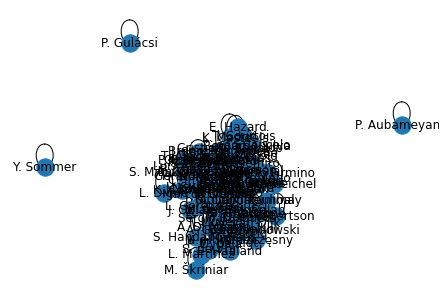

In [155]:
g=nx.from_pandas_edgelist(dfnet,'Source','Target')
#Plotting graph
nx.draw(g,with_labels=True)
 #As before... , few players with self loop--> meaning that they don't have any nation or teammate in the top 100. Will they represent a community of their own or will be they considered as belonging to a single community?

Computing components measure and community detection for the second dataset (one random edge with a player in the same nation and one with players in the same team for each player)


Is the graph connected?:
False
Number of components:
4
The biggest component  is a:
Graph with 97 nodes and 171 edges
Number of nodes of the biggest component:
97
Degree Centrality of top 10 nodes:
[('I. Gündoğan', 0.07291666666666666), ('Neymar Jr', 0.0625), ('M. Verratti', 0.0625), ('Jorginho', 0.0625), ('Thiago', 0.0625), ('Marquinhos', 0.0625), ('M. Rashford', 0.05208333333333333), ('K. De Bruyne', 0.05208333333333333), ('S. Agüero', 0.05208333333333333), ('M. ter Stegen', 0.05208333333333333)]
Betwenness Centrality of top 10 nodes:
[('I. Gündoğan', 683.1201298701299), ('Jorginho', 575.2580447330449), ('M. ter Stegen', 518.0591991341993), ('Thiago', 439.2608946608947), ('K. De Bruyne', 425.6885281385283), ('Neymar Jr', 407.9919913419915), ('M. Verratti', 395.2000360750362), ('Alisson', 334.90923520923513), ('S. Agüero', 325.2592712842714), ('T. Kroos', 320.1314213564214)]
Closeness Centrality of top 10 nodes:
[('I. Gündoğan', 0.2831858407079646), ('Jorginho', 0.2742857142857143), (

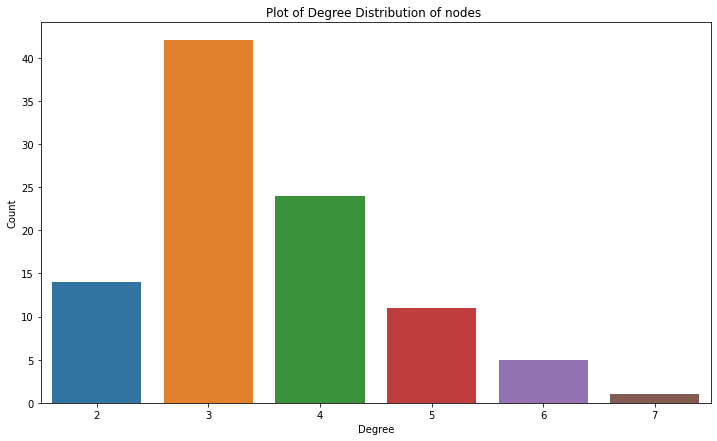

In [156]:
Components(g)
largest_cc_nodeset = max(nx.connected_components(g), key=len) #Largest of connected components
Componentrandom = g.subgraph(largest_cc_nodeset).copy()
ComponentMeasures(Componentrandom)
degree(Componentrandom,g) #Plotting distribution of degrees of the giant component

### Community Detection


#### Looking for communities with a divisive algorithm --> Girvan-Newman

[['M. Salah', 'Parejo', 'S. Mané', 'J. Oblak', 'T. Courtois', 'K. Koulibaly', 'A. Gómez', 'L. Martínez', 'Sergio Busquets', 'M. Reus', 'Jordi Alba', 'S. Gnabry', 'R. Lewandowski', 'Luis Alberto', 'F. de Jong', 'V. van Dijk', 'T. Müller', 'Fabinho', 'A. Griezmann', 'E. Hazard', 'J. Kimmich', 'Carvajal', 'M. Hummels', 'Neymar Jr', 'L. Modrić', 'Thiago', 'E. Haaland', 'A. Laporte', 'K. Navas', 'M. Verratti', 'A. Robertson', 'L. Bonucci', 'K. De Bruyne', 'R. Lukaku', 'S. Milinković-Savić', 'W. Szczęsny', 'Koke', 'Alisson', 'Gerard Moreno', 'S. Agüero', 'M. de Ligt', 'Jorginho', 'Oyarzabal', 'Marquinhos', 'G. Donnarumma', 'Casemiro', 'Ederson', 'K. Casteels', 'Marcos Llorente', 'G. Chiellini', 'T. Kroos', 'S. de Vrij', 'L. Insigne', 'L. Goretzka', 'Rodri', 'D. Alaba', 'S. Handanovič', 'A. Hakimi', 'K. Mbappé', 'David Silva', 'L. Messi', 'M. Škriniar', 'P. Dybala', 'M. Depay', 'I. Gündoğan', 'K. Benzema', 'A. Di María', 'M. ter Stegen', 'Thiago Silva', 'Sergio Ramos', 'M. Neuer', 'Roberto Fi

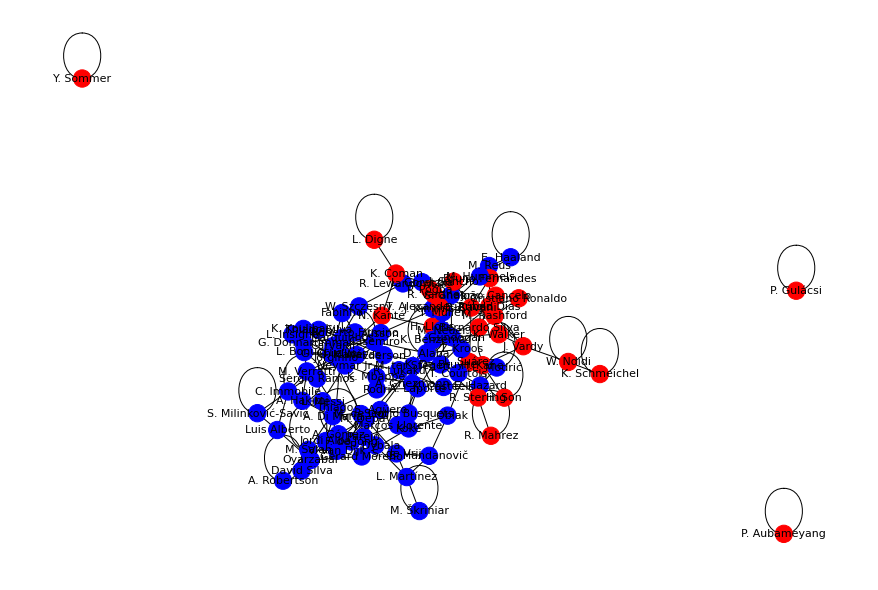

In [157]:
##Girvan Newman community detection --> Divisive clustering
communities=girvan_newman(g, most_valuable_edge=None)
plt.figure(figsize=(12,8))
node_groups = []
for com in next(communities):
  node_groups.append(list(com))
print(node_groups)
color_map = []
for node in g:
    if node in node_groups[0]:
      color_map.append('blue')
    else: 
      color_map.append('red')  
nx.draw(g, node_color=color_map, with_labels=True, font_size=11)
plt.show()
#It detects only two communities which are mostly composed by :
#Seems that Blue Serie A,Ligue 1 players <--> Red Bundesliga,La Liga and Premier League players but it is not 100% perfect 

It detects only two communities which are mostly composed by: 
Seems that blue nodes are Serie A,Ligue 1 players <--> red ones are Bundesliga,La Liga and Premier League players.\
However  it is not 100% perfect given the randomness of the edges

#### Looking for communities with an agglomerative algorithm --> Louvain method

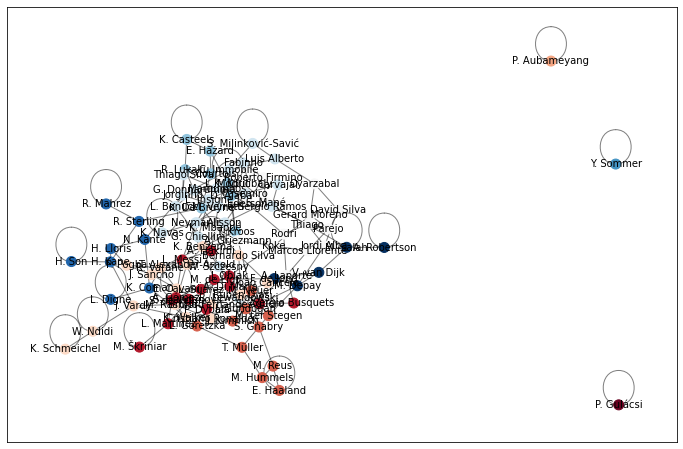

In [158]:
##Louvain community detection --> Agglomerative clustering
import matplotlib.cm as cm
partition = community_louvain.best_partition(g)
plt.figure(figsize=(12,8))
# draw the graph
pos = nx.spring_layout(g)
# color the nodes according to their partition
cmap = cm.get_cmap('RdBu', max(partition.values()) + 1)
nx.draw_networkx_nodes(g, pos, partition.keys(), node_size=100,
                       cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(g, pos, alpha=0.5)
nx.draw_networkx_labels(g,pos,font_size=10)
plt.show()
#A lot of different communities : mosts are between players of the same club but there are some also between players of similar nationalities

A lot of different communities : mosts are between players of the same club but there are some also between players of similar nationalities

In [159]:
findcliques(g,3,5)
#Obviously many less dense neighbourhoods related to the fact that they only have random edges by club and nationality

3-nodes clique:

['Luis Alberto', 'S. Milinković-Savić', 'C. Immobile']

['M. Rashford', 'J. Vardy', 'K. Walker']

['E. Haaland', 'M. Hummels', 'M. Reus']

['Bernardo Silva', 'Rúben Dias', 'João Cancelo']

['M. ter Stegen', 'M. Depay', 'S. Agüero']

['M. Verratti', 'Jorginho', 'C. Immobile']

['S. Handanovič', 'L. Martínez', 'S. de Vrij']

['F. de Jong', 'V. van Dijk', 'M. Depay']

['M. ter Stegen', 'S. Gnabry', 'J. Kimmich', 'I. Gündoğan', 'M. Neuer']

4-nodes clique:

I'm sorry there are no 4-nodes cliques in this graph

5-nodes clique:

I'm sorry there are no 5-nodes cliques in this graph



Obviously many less dense neighbourhoods related to the fact that they only have random edges by club and nationality

## Conclusions 

As can be seen from the networks plotted, we different partitions of players detected by two main algorithms: agglomerative (Louvain),which identifies different partitions related to club and nations,  and divisive (Girvan-Newman),which identifies only two communities. The three nodes which do not have any link with the others (Aubameyang, Gulàcsi and Sommer) seem to form in both initial network and semi-random network, respectively a unique community for the Girvan-Newman while they form each one a different community according to Louvain. \

Another interesting insight is that of the two players belonging to the biggest component in the first graph (Ndidi, Schmeichel), classified by the Girvan Newman algorithm as belonging to the same community of those three in the other three unconnected components of the graph. These two are probably detected as belonging to the other community because they have both only one connection with other players in the top 100 since they are the only ones of their nations to be in the top 100.\


So this explicitly tells us that, by applying two different clustering algorithms for partitioning the nodes in both a true and semi-random environment, the key finding of the study is that in order to be in the top 100 in FIFA players have to belong to one of the strongest clubs in the world. Only 3% of the players in the top 100 don’t belong to one of the current best teams in the world.\
Moreover, as seen with the first Girvan-Newman algorithm for Schemichel and Ndidi which are the only players of their nation (together with the three outside the giant component),  belonging to the strongest club is not enough.\
We can state that in order to be in the top 100 on FIFA you have to both play for one of the best teams in the world and you have to belong to one of those niches of nations with other strong players.

In [160]:
pie= px.pie(values=[97,3], names=['Players in Top Clubs or in niche of top football nations', 'Players not in Top Clubs or Nations'], title='Percentage of players in the top 100',color_discrete_sequence=px.colors.qualitative.D3)
# Define hover info, text size, pull amount for each pie slice, and stroke
pie.update_traces(hoverinfo = 'label+percent', textfont_size = 12, textinfo = 'label+percent')
pie.show()